In [1]:
# import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import glob
from tabulate import tabulate
from datetime import date
import pandas as pd
from os import walk
import peakutils
from peakutils.plot import plot as pplot
sys.path.append(r'/media/labfiles/lab-codes')
from labexp import experiments
path1=r'/media/labfiles/ruco/experiments/m43140'
path2=r'/media/labfiles/ruco/experiments/m43141'
path3=r'/media/labfiles/ruco/experiments/m43521'
path4=r'/media/labfiles/ruco/experiments/m43522'
path5=r'/media/labfiles/ruco/experiments/m43523'
path6=r'/media/labfiles/ruco/experiments/m43171'
path7=r'/media/labfiles/ruco/experiments/m43172'
path8=r'/media/labfiles/ruco/experiments/m43226'


In [ ]:
import re
class data():
    def __init__(self,ini,fin,exp,setdata,**kwargs):
        self.ini = ini
        self.fin = fin
        self.exp = exp
        self.setdata = setdata
        # setting any extra parameters provided with initialisation
        for key,value in kwargs.items():
            setattr(self,key,value)
            
class AttrDict(dict):
    """turns a dictionary into an object with attribute style lookups"""
    def __init__(self, *args, **kwargs):
        super(AttrDict, self).__init__(*args, **kwargs)
        self.__dict__ = self
        
class expimport(data):
    def __init__(self,inputfile):
        if type(inputfile)==dict:
            inputfile=AttrDict(inputfile)   
        
        self.ini = inputfile.ini
        self.fin   = inputfile.fin
        self.exp   = inputfile.exp
        self.setdata = inputfile.setdata
        self.foldername  = inputfile.exp.pathname
        self.data        = inputfile.exp.data
        self.filesname   = inputfile.exp.filesname
        self.pf = inputfile.exp.pathname[self.setdata]
        self.print = inputfile.printf
        if self.print == 'yes':
            print(self.foldername[self.setdata])
            f = open(glob.glob(self.pf+'/*.txt')[0], 'r',encoding='latin-1')
            file_contents = f.read()
            print (file_contents.strip())
            f.close()
        
    def analisis(self):
        di = self.ini
        df = self.fin
        data = self.data
        setd = self.setdata
        filesname = self.filesname
        avx=0
        avras=0
        avr=0
        rr = self.fin-self.ini
        for i in range(di,df):
            ldata = len(data[setd][i][:,1])
            for j in range(ldata):
                if data[setd][i][j,1] > 1 or data[setd][i][j,1] < -1:
                    data[setd][i][j,1] =  data[setd][i][j-1,1]
            plt.plot(data[setd][i][:,0],data[setd][i][:,1],label=re.split(r'\W+',filesname[setd][i])[-2])
            avx+=data[setd][i][:,0]
            avras+=data[setd][i][:,1]
            avr+=data[setd][i][:,2]
            
        avx/=rr
        avras/=rr
        avr/=rr
    
        self.avx   = avx
        self.avras = avras
        self.avr   = avr        
        class results(): pass
        results = results()
        results.avx = self.avx
        results.avras = self.avras
        results.avr = self.avr
        results.setdata = self.setdata
        results.folername  = self.foldername
        results.filesnames = self.filesname 
        return results


# Sample 

In [3]:
expm43140= experiments(path1,'ras')

|  No. Dir  | Name Dir                                              |  No. files  |
|-----------|-------------------------------------------------------|-------------|
|     0     | /m43140/exp-2018-09/2018-09-05-ras-pr                 |      5      |
|     1     | /m43140/exp-2018-09/2018-09-06-ras-pr                 |      4      |
|     2     | /m43140/exp-2018-09/2018-09-08-ras-pr                 |      4      |
|     3     | /m43140/exp-2018-09/2018-09-10-ras-pr                 |      1      |
|     4     | /m43140/exp-2018-09/2018-09-11-ras-pr                 |      5      |
|     5     | /m43140/exp-2018-09/2018-09-12-ras-pra                |      2      |
|     6     | /m43140/exp-2018-11/2018-11-20-ras-pr                 |      6      |
|     7     | /m43140/exp-2018-11/2018-11-22-ras-pr                 |      7      |
|     8     | /m43140/exp-2019-03/2019-03-05-ras-ccd                |      0      |
|     9     | /m43140/exp-2019-03/2019-03-05-ras-ccd/Exp01-RD-Loff  |      0

In [14]:
# class pardata(object): pass
p = pardata() # this will be our datastructure
p.exp = expm43140
p.ini = 0
p.fin = 2
p.setdata = 15
p.printf = 'yes'

data = p
setexp  = expimport(data).analisis()
avx     = setexp.avx
avrasp1   = setexp.avras
avrp     = setexp.avr
#data    =  setexp.data
fn      = setexp.filesnames
plt.plot(avx,avrasp1,label="Average")
plt.legend()
plt.show()

NameError: name 'pardata' is not defined

In [15]:
p2 = pardata() # this will be our datastructure
p2.exp = expm43171
p2.ini = 0
p2.fin = 2
p2.setdata = 4
p2.printf = 'yes'
data2 = p2
setexp2  = expimport(data2).analisis()
avx2     = setexp2.avx
avrasp2   = setexp2.avras
avrp2     = setexp2.avr
plt.plot(avx2,avrasp2,label="Average")
plt.legend()
plt.show()

NameError: name 'pardata' is not defined

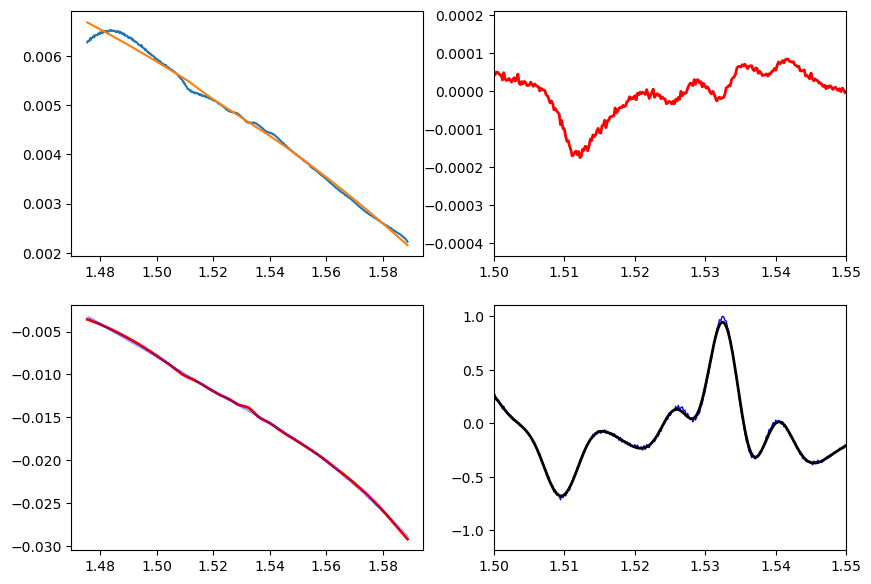

In [54]:
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter

spr = savgol_filter(avrasp1, 401, 2) 
sr1 = savgol_filter(avr, 301, 2) 

ras = avrasp1-spr
r1  = (avr-sr1)

r1 /= np.max(r1)
sr2 = savgol_filter(r1, 71, 7) 

fig,ax = plt.subplots(2,2,figsize=(10,7))
ax[0,0].plot(avx,avrasp1)
ax[0,0].plot(avx,spr)
ax[0,1].plot(avx,ras,'-r',lw=2)
ax[0,1].set_xlim([1.5,1.55])

ax[1,0].plot(avx,avr,'-r',lw=2)
ax[1,0].plot(avx,sr1,'ob',ms=0.1,mfc='none')

ax[1,1].plot(avx,r1,'-b',lw=1)
ax[1,1].plot(avx,sr2,'-k',lw=2)

ax[1,1].set_xlim([1.5,1.55])
#plt.plot(avx,rs-avr)
plt.show()